In [1]:
#Importing Libraries
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading processed data after Label Encoding
df_insurance = pd.read_csv('insurance_processed.csv')

In [4]:
df_insurance.head()

age  sex     bmi  children  smoker  region      charges  bmi_Intense_cat
0   19    0  27.900         0       1       3  16884.92400                0
1   18    1  33.770         1       0       2   1725.55230                0
2   28    1  33.000         3       0       2   4449.46200                0
3   33    1  22.705         0       0       1  21984.47061                0
4   32    1  28.880         0       0       1   3866.85520                0

In [5]:
df_insurance.shape

(1338, 8)

In [6]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1338 non-null   int64  
 1   sex              1338 non-null   int64  
 2   bmi              1338 non-null   float64
 3   children         1338 non-null   int64  
 4   smoker           1338 non-null   int64  
 5   region           1338 non-null   int64  
 6   charges          1338 non-null   float64
 7   bmi_Intense_cat  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [7]:
df_insurance.describe()

age          sex          bmi     children       smoker  \
count  1338.000000  1338.000000  1338.000000  1338.000000  1338.000000   
mean     39.207025     0.505232    30.663397     1.094918     0.204783   
std      14.049960     0.500160     6.098187     1.205493     0.403694   
min      18.000000     0.000000    15.960000     0.000000     0.000000   
25%      27.000000     0.000000    26.296250     0.000000     0.000000   
50%      39.000000     1.000000    30.400000     1.000000     0.000000   
75%      51.000000     1.000000    34.693750     2.000000     0.000000   
max      64.000000     1.000000    53.130000     5.000000     1.000000   

            region       charges  bmi_Intense_cat  
count  1338.000000   1338.000000      1338.000000  
mean      1.515695  13270.422265         0.107623  
std       1.104885  12110.011237         0.310020  
min       0.000000   1121.873900         0.000000  
25%       1.000000   4740.287150         0.000000  
50%       2.000000   9382.033000         0.000000  
75%       2.000000  16639.912515         0.000000  
max       3.000000  63770.428010         1.000000

# Building Model : Linear Regression

In [8]:
# Import Scikit learn packages 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
tar_cols = ['charges']

In [10]:
dep_cols = set(df_insurance.columns) - set(tar_cols)

In [11]:
dep_cols

{'age', 'bmi', 'bmi_Intense_cat', 'children', 'region', 'sex', 'smoker'}

In [12]:
X = df_insurance[dep_cols]
y = df_insurance[tar_cols]

In [13]:
X.head()

children  region  bmi_Intense_cat  smoker     bmi  age  sex
0         0       3                0       1  27.900   19    0
1         1       2                0       0  33.770   18    1
2         3       2                0       0  33.000   28    1
3         0       1                0       0  22.705   33    1
4         0       1                0       0  28.880   32    1

In [14]:
y.head()

charges
0  16884.92400
1   1725.55230
2   4449.46200
3  21984.47061
4   3866.85520

In [15]:
# Splitting Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [16]:
X_train.shape

(936, 7)

In [17]:
y_train.shape

(936, 1)

In [18]:
X_test.shape

(402, 7)

In [19]:
y_test.shape

(402, 1)

In [20]:
lr = LinearRegression()  # Instantiate Linear Regression model

In [21]:
#Training Model
model = lr.fit(X_train, y_train)

In [22]:
model

LinearRegression()

In [23]:
X_test

children  region  bmi_Intense_cat  smoker     bmi  age  sex
559          0       1                0       0  35.530   19    1
1087         0       1                0       0  31.540   57    1
1020         0       3                0       0  37.000   51    1
460          3       2                0       0  36.630   49    0
802          1       3                0       0  22.300   21    1
...        ...     ...              ...     ...     ...  ...  ...
323          0       0                0       0  40.945   57    1
1268         0       3                0       0  33.300   20    0
134          0       0                0       0  28.785   20    0
1274         0       2                0       1  27.060   26    1
876          1       3                0       0  27.100   49    0

[402 rows x 7 columns]

In [24]:
y_pred = model.predict(X_test)

In [25]:
len(y_pred)

402

In [26]:
type(y_pred)

numpy.ndarray

In [27]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()

0
0   2856.366186
1  12508.138917
2  10596.054976
3  12189.762045
4   2470.747192

In [28]:
#Change the column name of y_pred Data Frame
y_pred_df.columns = ['charges'] # Setting column name as charges

In [29]:
y_pred_df.head()

charges
0   2856.366186
1  12508.138917
2  10596.054976
3  12189.762045
4   2470.747192

In [30]:
y_test.head()

charges
559    1646.4297
1087  11353.2276
1020   8798.5930
460   10381.4787
802    2103.0800

In [31]:
y_test.reset_index(drop=True,inplace=True)

In [32]:
y_test.head()

charges
0   1646.4297
1  11353.2276
2   8798.5930
3  10381.4787
4   2103.0800

In [33]:
y_test.shape

(402, 1)

In [34]:
y_pred_df.shape

(402, 1)

In [35]:
df_error = y_test['charges'] - y_pred_df['charges']
df_error.head()

0   -1209.936486
1   -1154.911317
2   -1797.461976
3   -1808.283345
4    -367.667192
Name: charges, dtype: float64

In [36]:
df_error = y_test- y_pred_df
df_error.head()

charges
0 -1209.936486
1 -1154.911317
2 -1797.461976
3 -1808.283345
4  -367.667192

C:\Sagar\Softwares\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

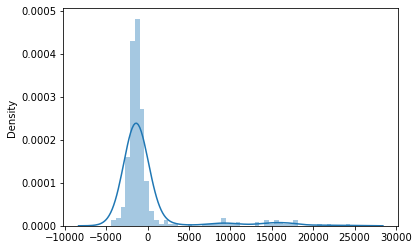

In [37]:
sns.distplot(df_error)

In [38]:
#Creating a Column Error in y_test DataFrame
y_test['error'] = y_test - y_pred_df
y_test.head()

<ipython-input-38-3b91199f3ed0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_test['error'] = y_test - y_pred_df


charges        error
0   1646.4297 -1209.936486
1  11353.2276 -1154.911317
2   8798.5930 -1797.461976
3  10381.4787 -1808.283345
4   2103.0800  -367.667192

<AxesSubplot:xlabel='charges', ylabel='error'>

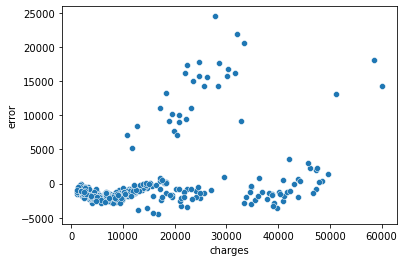

In [39]:
sns.scatterplot(data=y_test, x='charges', y='error')

## Analysing Error

In [40]:
from sklearn import metrics
from sklearn.metrics import r2_score # For 

In [41]:
# MAE
MAE = metrics.mean_absolute_error(y_test['charges'], y_pred_df['charges'])

In [42]:
MSE = metrics.mean_squared_error(y_test['charges'], y_pred_df['charges'])

In [43]:
RMSE = np.sqrt(MSE)

## Evaluating Using R- Square Error

In [44]:
R_Sq = r2_score(y_test['charges'], y_pred)

MAE -  2412.750708425392
MSE -  18745541.830189306
RMSE -  4329.612203210503
R-Sq -  0.8677252193115688


## Evaluating Using Adjusted R- Square

In [56]:
#Total Sample size
len(y_test)

402

In [57]:
#Total No. of predictors

In [59]:
X_train.shape[1]

7

In [61]:
Adj_RSq = 1- (1-R_Sq)*(len(y_test)-1)/(len(y_test) - X_train.shape[1] -1)
Adj_RSq

0.8653751597561905

In [63]:
print('MAE - ', MAE)
print('MSE - ', MSE)
print('RMSE - ', RMSE)
print('R-Sq - ', R_Sq)
print('Adj_RSq - ', Adj_RSq)

MAE -  2412.750708425392
MSE -  18745541.830189306
RMSE -  4329.612203210503
R-Sq -  0.8677252193115688
Adj_RSq -  0.8653751597561905


## Slopes of all dependent varibles

In [46]:
model.coef_  

array([[  427.08430417,  -320.23135263, 19170.71097665, 13878.50679124,
           52.2449026 ,   259.47973401,  -530.51288579]])

## Y Intercept

In [47]:
# gives Y-intercept
model.intercept_ 

array([-3079.26591094])

In [48]:
X_test.head()

children  region  bmi_Intense_cat  smoker    bmi  age  sex
559          0       1                0       0  35.53   19    1
1087         0       1                0       0  31.54   57    1
1020         0       3                0       0  37.00   51    1
460          3       2                0       0  36.63   49    0
802          1       3                0       0  22.30   21    1

In [49]:
df_insurance.region.unique()

array([3, 2, 1, 0], dtype=int64)

In [50]:
#sns.regplot(x="bmi", y="charges", data=df_insurance);

In [51]:
#sns.regplot(x="age", y="charges", data=df_insurance);